In [39]:
import numpy as np
import scipy.ndimage as ndimage
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

SHAKEY_PATH = './data/shakey.150.gif'

In [150]:
# This is just a poor idea I had earlier
def compute_local_variance_around_edges(image, zero_crossings, window_size=3):
    # Window size seends to be odd to have a center
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    padded_image = np.pad(image, half_window, mode='reflect')
    
    local_variance = np.zeros_like(image, dtype=float)

    edge_pixels = np.argwhere(zero_crossings)
    for y, x in edge_pixels:
        y_padded, x_padded = y + half_window, x + half_window

        window = padded_image[y_padded-half_window:y_padded+half_window+1,
                              x_padded-half_window:x_padded+half_window+1]

        variance = np.var(window)
        local_variance[y, x] = variance
    
    return local_variance

def find_zero_crossings(laplacian):
    lap = np.sign(laplacian)
    diff_x = np.diff(lap, axis=1)
    diff_y = np.diff(lap, axis=0)

    zero_cross_x = (diff_x != 0)
    zero_cross_y = (diff_y != 0)

    edges = np.zeros_like(lap)
    edges[:-1, :] |= zero_cross_y
    edges[:, :-1] |= zero_cross_x

    return edges

def variance_thresholding(image, filtered_image, variance_threshold, window_size=3):
    zero_crossings = find_zero_crossings(filtered_image)
    local_variance_around_edges = compute_local_variance_around_edges(image, zero_crossings, window_size=window_size)
    significant_edges = zero_crossings & (local_variance_around_edges > variance_threshold)
    return significant_edges

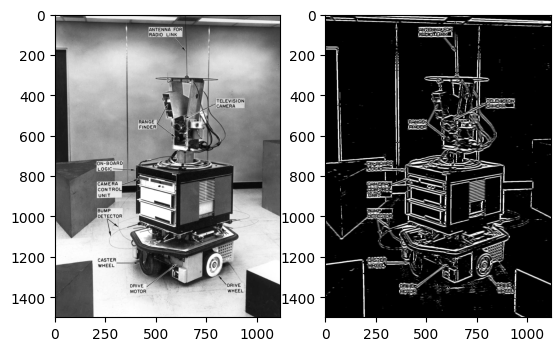

In [161]:
# Visualizations
fig = plt.figure()
plt.gray()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Processing
image_path = SHAKEY_PATH
image = Image.open(image_path).convert('L')
image = np.array(image)
filtered_image = ndimage.gaussian_laplace(image, 2.5)

# Display
ax1.imshow(image)
ax2.imshow(filtered_image)